# Basic options

The *cpd* function has several options at disposal. Some of them may improve performance, precision or give insights about the tensor at hand. If you look at the source code, the first line of *cpd* is the following:

    def cpd(T, r, options=False):

The first action of the **cpd** function is to read *options*. When set to False, this function set the parameters to their default values. In order to change some of them the user needs to create the class *options* and add the parameters of interest with their corresponding values. The default class with all the default parameters is showed below:

    class options:
        maxiter = 200  
        tol = 1e-12
        method = 'cg'
        method_maxiter = 1
        method_tol = 1e-6
        init_method = 'random'
        trunc_dims = 0
        level = 1
        init_damp = 1
        refine = False
        symm = False
        constraints = [0, 0, 0]
        trials = 10
        display = 0

There are a lot of options, but don't worry, I will explain them one by one now. If you don't want to bother learning the details, be assured that all default values were obtained by an long and exhausting marathon of tests, with lots of different tensors. Of course we can't say these values will apply to all possible tensor, but you can just wait to verify a failure before digging deeper in the details. 

For the others with more patience, let's see what each options does, not in the order above but in a more didatic order. Let's start importing the necessary modules. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

# Trials

Tensor Fox has distinct approaches when it comes to computing the CPD of third order tensors and higher order tensors. For third order tensors the program relies on the *Damped Gauss-Newton* (dGN) method. For higher order tensors the program relies on the *Tensor Train format* (TT format), also called *Tensor Train decomposition*. Without going in too much details, we use a specific configuration of the TT format which can be obtained by computing several third order CPD's. More precisely, if $T$ is a tensor of order $L$, then we can compute a CPD for it by computing $L-2$ third order CPD's. Once we have the TT format of $T$, the CPD can also be computed.

In the case $T$ has order higher than $3$, the parameter *trials* defines how much times we compute each one of these third order CPD's. The idea is to compute several times and keep the best result (smaller error). This may be helpful because all $L-2$ CPD's needs to be of good quality in order to get a good CPD for $T$. If anyone of the third order CPD's has bad precision, than everything falls apart. Currently the default is *trials*$= 10$, but this may change depending on the problem. This parameter doesn't makes difference if $T$ is a third order tensor.

# Display

There are four choices for the *display* option: $-1,0,1,2,3,4$. These options controls what the user can see during the computations (works as the *verbose* parameter, but I prefer the name *display*). In the previous lesson we let the defaults and there were no output whatsoever (because the display default is $0$).

 - *display* $=0$ (default): show nothing on the screen.

 - *display* $=1$: shows useful information about the principal stages of the computation 
    
 - *display* $=2$: shows everything the option *display* $=1$ shows plus information about each iteration
    
 - *display* $=3$ is special, it shows eveything the option *display* $=2$ shows and also shows the relative error of the compressed tensor (the computation of this error is costly so avoid that for big tensors)
    
 - *display* $=4$ is almost equal to *display* $=3$ but now there are more digits displayed on the screen (*display* $=3$ is a "clean" version of *display* $=4$, but with less informtation) 
    
 - *display* $=-1$ is a special option for it is reserved for tensors of order higher than $3$. 
    
To see how this parameter affects the visualization, let's start creating our toy model tensor.

In [2]:
# Create and print the tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1
                    
tfx.disp.showtens(T)

[[0. 1.]
 [2. 3.]]

[[4. 5.]
 [6. 7.]]



In [3]:
# Create class of options with display=1.
class options:
    display = 1

# Compute the CPD of T with partial display.
r = 3
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 32
    Relative error = 1.5322304953907926e-07
    Accuracy =  99.99998 %


In [4]:
# Compute the CPD of T with full display.
options.display = 2
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 9.44e-01  |  9.44e-01   |  1.01e+01  |    2.10e-02     |        2        
        2     | 4.01e-01  |  5.43e-01   |  6.75e+00  |    7.92e-03     |        3        
        3     | 1.42e-01  |  2.58e-01   |  1.60e+01  |    3.39e-03     |        3        
        4     | 8.03e-02  |  6.19e-02   |  4.40e+00  |    2.88e-06     |        4        
        5     | 5.96e-02  |  2.08e-02   |  1.97e+00  |    3.02e-07     |        5        
        6     | 4.45e-02  |  1.51e-02   |  

In [5]:
# Compute the CPD of T with full display plus relative error of compression.
options.display = 3
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
    Compression relative error = 0.000000e+00
-----------------------------------------------------------------------------------------------
Type of initialization: random
    Initial guess relative error = 1.207675e+00
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 9.83e-01  |  9.83e-01   |  1.99e+01  |    1.95e-01     |        2        
        2     | 3.41e-01  |  6.41e-01   |  5.27e+00  |    6.32e-02     |        3        
        3     | 1.83e-01  |  1.58e-01   |  1.07e+01  |    1.36e-03     |        3        
        4     | 1.33e-01  |  5.01e-02   |  5.88e+00  |    4.27e-05     |        3        
        5     | 9.50e-02  |  3.80e-02  

The difference between display $2$ and $3$ is only the initial guess relative error, which is given when *display* $=3$. This is the error $\|T - T_{approx}^{(0)}\| / \|T\|$, where $T_{approx}^{(0)}$ is the starting point of the iterations. Sometimes it can be useful to know if the starting point is too far away or not from the objective tensor. Since the computation of this error is very costly, I've made this as an extra option. Below there are the description of each column.

 - Iteration: it just the numbering of the iterations.
 
 - Rel error: the relative error between the current approximation and the objective tensor.
 
 - Improvement: the difference (in absolute value) between two consecutive errors, i.e., it is the value
 
 $$\left| \frac{\| T - T_{approx}^{(k)} \|}{\| T \|} - \frac{\| T - T_{approx}^{(k-1)} \|}{\| T \|} \right|,$$
where $k$ is the numbering of the current iteration. 

 - norm(grad): the original problem can be regarded as a nonlinear least squares problem, and a minimizer is also a critical point, so it is of interest to keep track of the (infinite) norm of the gradient to check if it is approaching zero.
 
 - Predicted error: each iteration tries to minimize a linear model of the original problem. After we compute such a minimizer we have a error of this model which is expected to be close to the original one. This is important for updating the damping parameter.
 
 - Inner iterations: the linear model mentioned above can be solved by the [conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method) method (default) os the [LSMR](http://web.stanford.edu/group/SOL/software/lsmr/) (least squares with minimal residuals) method. Both method are iterative and it can be useful to keep track of the number of iterations they are using. 
 
 It should be noted that the first informations are about the MLSVD and initialization method, we will talk about it soon.

As we've said, the options *trials* says about the repetition of third order CPD computations. If *display* is set to $1, 2, 3$ or $4$, then all the information of each one of these CPD's are printed on the screen. This means we wil have $(L-2) \cdot trials$ CPD's informations printed on the screen when $T$ has order $L$ . Sometimes this amount of information is just too much. We can make everything more succint in these situations just by setting *display* $=-1$. Consider the following fourth order tensor.

In [6]:
# Initialize dimensions of the tensor.
k = 3
dims = (k, k, k, k)
L = len(dims)

# Create four random factors matrices so thar 
# A = (orig_factors[0], orig_factors[1], orig_factors[2], orig_factors[3])*I.
orig_factors = []
for l in range(L):
    M = np.random.randn(k, r)
    Q, R = np.linalg.qr(M)
    orig_factors.append(Q)
    
# From the factor matrices generate the respective tensor in coordinates.
A = np.zeros(dims)
A = tfx.cnv.cpd2tens(A, orig_factors, dims)

print('A = ')
tfx.disp.showtens(A) # now this is the same as print(A)

A = 
[[[[-7.02988856e-01  2.59239766e-03 -2.27199661e-01]
   [-4.22709058e-02  1.47002543e-04  4.28931269e-03]
   [ 1.79021392e-01 -1.93671383e-02  5.72776702e-02]]

  [[ 1.83639213e-01 -4.92174624e-02  5.14500084e-02]
   [ 7.77842070e-03  2.38025671e-02  9.43094904e-03]
   [-3.96342390e-02 -1.80695503e-01 -4.12918384e-02]]

  [[ 5.36203868e-01  4.83261697e-03  1.73760249e-01]
   [ 2.20373741e-02 -8.67890506e-03  2.81922656e-02]
   [-1.38967252e-01  3.97444229e-02 -3.54555464e-02]]]


 [[[ 1.42958825e-01 -2.37462432e-02  4.15311521e-02]
   [-7.73526514e-03  4.14066780e-03  4.98103257e-02]
   [-3.49594408e-02 -8.64242036e-02 -1.79548716e-02]]

  [[-2.77746053e-02 -2.35737940e-01 -4.68497284e-02]
   [-9.04446306e-03  1.19995663e-01  2.52235531e-02]
   [ 4.28480247e-02 -9.02417271e-01 -1.29273898e-01]]

  [[-1.09797997e-01  5.18541121e-02 -2.83256874e-02]
   [-2.32292025e-02 -3.50841017e-02  5.15473163e-02]
   [ 1.77305028e-02  1.91811615e-01  4.54040796e-02]]]


 [[[-1.12713125e-02 -3.41

In [7]:
# Compute the CPD of A with succint display for higher order tensors.
options.display = -1
factors, A_approx, output = tfx.cpd(A, r, options)

Total of 2 third order CPDs to be computed:
1 ) CPD error = 8.216388230917005e-08
2 ) CPD error = 1.8083612346754555e-07

Final results
    Number of steps = 45
    Relative error = 1.8504773394049537e-07
    Accuracy =  99.99998 %


In [8]:
# The user may be interested in see how each third order CPD is computed.
options.display = 1
factors, A_approx, output = tfx.cpd(A, r, options)

Total of 2 third order CPDs to be computed:

CPD 1
-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (3, 3, 3)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 16
    Relative error = 2.863647294855388e-07
    Accuracy =  99.99997 %

CPD 2
-----------------------------------------------------------------------------------------------
Computing MLSVD of T
    No compression detected
    Working with dimensions (3, 3, 3)
-----------------------------------------------------------------------------------------------
Type of initialization: fixed + random
-----------------------------------------------------------------------------------------------
Comp

# Truncation

In applications of linear algebra, often one have to compute the truncated SVD of some matrix. By truncating we can reduce the dimensionality of the problem, which leads to lots of speed up for the upcoming algorithms. On the other hand, we lost information after the truncation. Ideally, we want to truncate as much as possible without losing the relevant information.

The same can be made for tensors, but in this context we use the [multilinear singular value decomposition](https://epubs.siam.org/doi/abs/10.1137/s0895479896305696) (MLSVD). If $T$ is a $L$-order tensor, then its MLSVD is written as $T = (U_1, \ldots, U_L) \cdot S$, where each $U_l$ is a orthogonal matrix and $S$ is a tensor with the same shape as $T$ (we consider $S$ as the *compressed* version of $T$). For the interested people, the notation used stands for the [multilinear multiplication](https://en.wikipedia.org/wiki/Multilinear_multiplication). This tensor $S$ is called the *central tensor* and it is the analogous of $\Sigma$ in the classical SVD of the form $A = U \Sigma V^T$. Note that we've said that $S$ is of the same shape as $T$, and just as in the 2D linear algebra, this is the *full* MLSVD, in contrast to the *reduced* MLSVD. In the same way we can consider the reduced SVD $A = U \Sigma V^T$ where $\Sigma$ is $R \times R$ (and $R$ is the rank of $A$), we can have $S$ of shape $R_1 \times R_2 \times \ldots \times R_L$. The tuple $(R_1, R_2, \ldots, R_L)$ is the *multilinear rank* of $T$. 

At first all we have is the full MLSVD, by Tensor Fox works the truncation for you at your taste. More precisely, you can tell the program if you want to truncate "a lot", "just a few", not truncate at all, etc. You can even tell the program to not compute the MLSVD and work with the original tensor (I do not advise to do that!). You communicate the program your type of truncation in the means of *levels*, where low levels translates to truncate a large amount and large levels translate to truncate small ammounts. Below we summarize the possible options you have (at the moment these only applies to third order tensors).

 - *level* $=0$: the conditions to truncate are very loose, so it is "easy" to truncate. This level causes very large truncations, which speeds uo the program at a cost of losing too much information of the original tensor.
 
 - *level* $=1$ (default): the conditions to truncation are median and reasonable. 
 
 - *level* $=2$: the conditions to truncate are more tight but still manageable. Some tensors require this kind of truncation where you just cut off a little piece of the central tensor.
 
 - *level* $=3$: the conditions to truncate are extremely tight. This is almost as saying you don't want to truncate anything.
 
 - *level* $=4$: you want to work with the tensor $S$ of the full MLSVD, which has the same shape of $T$.
 
 - *level* $=5$: you want to work with the original tensor $T$. In this case the MLSVD is not computed.
 
Finally,  we want to mention that you can also use the parameter *trunc_dims* to tell the program the exactly truncation you want to use. Just set this parameter to be a list of the dimensions you want (default is *trunca_dims = 0*, which lets the program to decide the best truncation). In the example we are working it is possible to note that the program is unable to truncate. Still, we can force some truncation, say $2 \times 1 \times 1$, and see if we get good precision of this. The precision can already be antecipated just by seeing the relative error of the compression (remember that this requires setting *display* to $3$, which can be costly), that is, the line

    Compression relative error = 0.130828

That line says this is the best precision we can get. This is because this is the error of the truncated $S$ and $T$, and all the iterations to be made will try to obtain a CPD for $S$.

In [9]:
options.display = 1
options.trunc_dims = [2,1,1]
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    Compression detected
    Compressing from (2, 2, 2) to (2, 1, 1)
    99.31 % of the energy was retained
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 31
    Relative error = 0.13082808697999668
    Accuracy =  86.91719 %


# Initialization

The iteration process needs a starting point for iterating. This starting point depends on the *init_method* option, and there are three possible choices in this case: *smart*, *smart_random*, *random* (default), and *user*. Both *smart* and *smart_random* options generates a CPD of rank $r$ with a strategy relying on the MLSVD. The strategy *smart* maximizes the energy of the initialization wheareas *smart random* makes almost the same, but with a chance to take some different entries. These strategies generates starting points with small relative error, so it is already close to the objective tensor. Although this seems to be a good thing, there is also a risk to be close to a local minimum or saddle point, and in this cases these methods will always fail. The *random* is more robust, this option generates a CPD of rank $r$ with entries drawn from the normal distribution. The relative error in this case usually is close to $1$. Finally, there is the 'user' option where the user provides a list $[X, Y, Z]$ as starting point. This is a good idea when we already have a close CPD and want to increase its precision.

In [10]:
# Compute the CPD of T with random initialization.
options.trunc_dims = 0
options.init_method = 'smart_random'
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: smart_random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 33
    Relative error = 1.7925153865634859e-07
    Accuracy =  99.99998 %


In [11]:
# Compute the CPD of T with user initialization.
X = np.ones((m, r))
Y = np.ones((m, r))
Z = np.ones((m, r))
options.init_method = [X,Y,Z]
factors, T_approx, info = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: user
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 11
    Relative error = 0.13079807124885923
    Accuracy =  86.92019 %


# Refinement

As we mentioned before, the user may give an initial CPD as starting point for our iterative algorithm, which may be a good idea when it is desired to increase the precision of the CPD. This process can be done automatically by setting *refine* to True. This option makes the program runs the algorithm two times, where the second run uses the approximated CPD computed in the first run as starting point. However, this second run is made in the original space (the space of the tensor $T$). Ideally, we want to compress and limit ourselves to the compressed version of $T$, but if this is not enough, the *refine* option can squeeze more precision at a cost of working with uncompressed tensors. 

In [12]:
# Compute the CPD of T with refinement.
options.display = 3
options.init_method = 'random'
options.refine = True
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
    Compression relative error = 0.000000e+00
-----------------------------------------------------------------------------------------------
Type of initialization: random
    Initial guess relative error = 1.149328e+00
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 9.90e-01  |  9.90e-01   |  1.53e+01  |    2.27e-01     |        2        
        2     | 7.68e-01  |  2.22e-01   |  3.10e+00  |    4.59e-03     |        3        
        3     | 4.03e-01  |  3.65e-01   |  1.30e+01  |    5.00e-02     |        3        
        4     | 1.33e-01  |  2.70e-01   |  2.56e+01  |    3.49e-03     |        3        
        5     | 6.96e-02  |  6.36e-02  

# Maximum number of iterations and tolerance

As the names suggest, *maxiter* is the maximum number of iterations permitted, whereas *tol* is the tolerance parameter, which is used to make stopping criteria. Both values are related in the sense we should increase *maxiter* when we decrease *tol*. The default value for the tolerance is *tol* = $10^{-12}$, but this not the actual value used. Once the program starts, it reassign the tolerance to $\min \{ 10^{-2}, 10^{-12}mnp \}$, where $m, n, p$ are the dimensions of the original tensor $T$. For example, one of the most relevant stopping criteria is the improvement of the relative error criterium. Let $T_{approx}^{(k)}$ be the approximation computed at the $k$-th iteration. Then the program stops if 
$$ \left| \frac{\| T - T_{approx}^{(k)} \|}{\| T \|} - \frac{\| T - T_{approx}^{(k-1)} \|}{\| T \|} \right| <  \verb|tol|,$$
where this tolerance is the new one, not the input one. Keep this in mind when giving tolerances for the program. Now let's decrease *tol* and see if we get better approximations for the CPD of this example. We use *tol* = 1e-16 and keep the rest with default values.

In [13]:
# Compute the CPD of T with tol = 1e-16.
options.refine = False
options.tol = 1e-16
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
    Compression relative error = 0.000000e+00
-----------------------------------------------------------------------------------------------
Type of initialization: random
    Initial guess relative error = 1.028796e+00
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 9.34e-01  |  9.34e-01   |  7.21e+00  |    2.95e-01     |        2        
        2     | 5.60e-01  |  3.74e-01   |  8.58e+00  |    1.83e-02     |        3        
        3     | 2.28e-01  |  3.32e-01   |  3.82e+01  |    5.70e-03     |        3        
        4     | 1.45e-01  |  8.26e-02   |  1.24e+01  |    4.35e-04     |        3        
        5     | 1.06e-01  |  3.91e-02  

To understad better how the tolerance influence the precision we can make a plot varying the tolerances. 

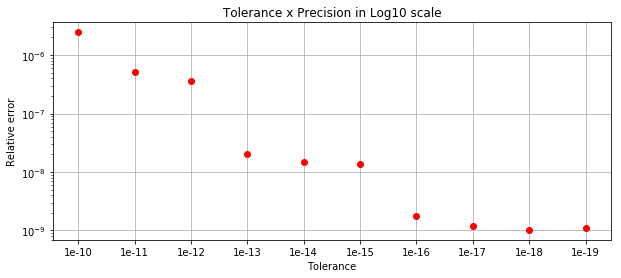

In [14]:
errors = []
options.display = 0
tolerances = [1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19]
tolerances_str = ['1e-10', '1e-11', '1e-12', '1e-13', '1e-14', '1e-15', '1e-16', '1e-17', '1e-18', '1e-19']

for tolerance in tolerances:
    options.tol = tolerance
    factors, T_approx, output = tfx.cpd(T, r, options)
    errors.append(output.rel_error)
    
plt.figure(figsize=[10,4])
plt.plot(tolerances_str, errors, 'ro')
plt.title('Tolerance x Precision in Log10 scale')
plt.xlabel('Tolerance')
plt.ylabel('Relative error')
plt.yscale('log')
plt.grid()
plt.show()